In [61]:
import json
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt

In [62]:
files = list(pathlib.Path("all/").glob("*"))

In [79]:
data = defaultdict()
now = None
for file in files:
    filename = file.stem
    head, dim, val = filename.split("_")
    with open(file, "r") as f:
        now = json.loads(f.read())
    data[(val,int(dim),int(head))] = now

In [80]:
data[("seen","512","4")]

KeyError: ('seen', '512', '4')

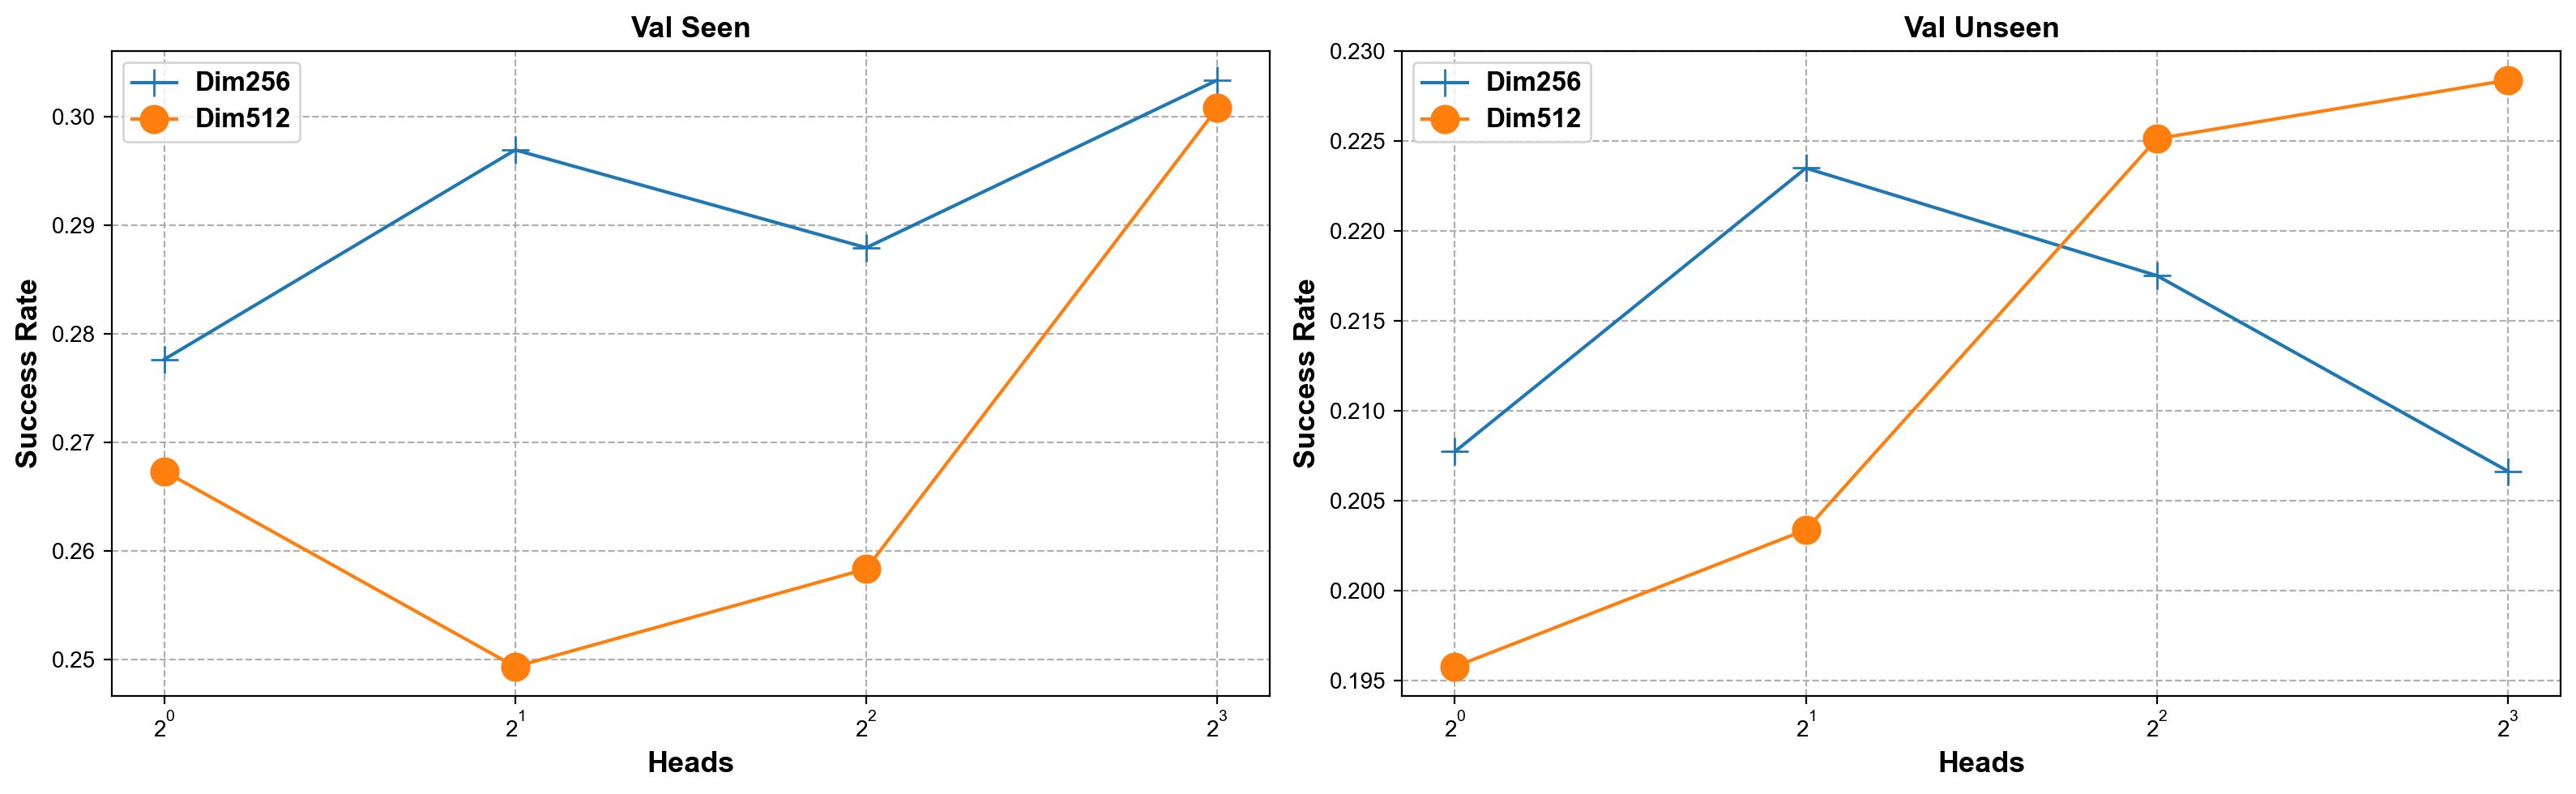

In [91]:

plt.rcParams['font.sans-serif'] = ["Arial"]
plt.rcParams['axes.unicode_minus'] = False
fig,axes = plt.subplots(1,2,figsize=(16, 5),dpi=200)
for i, split in enumerate(["seen","unseen"]):
    ax = axes[i]
    title = ""
    dims = [256, 512]
    markers = ["+","o"]
    for j, dim in enumerate(dims):
        heads = [1,2,4,8]
        y = [data[(split, dim, head)]["success"] for head in heads]
#         y = [now["success"]-j*0.1 for head in heads]
        ax.plot(heads, y, marker=markers[j], label=f"Dim{dim}", markersize=12)
    ax.legend()
    ax.grid(True, linestyle="--")
#     ax.set(ylim=(0.10, 0.24))
    ax.set_xscale('log', base=2)
    ax.set_xlabel("Heads", fontsize=13, fontweight='bold')
    ax.set_ylabel("Success Rate", fontsize=13, fontweight='bold')
    ax.set_title("Val "+split[0].upper()+split[1:], fontsize=13, fontweight='bold')
#     ax.set_xticks(fontsize=12, )
#     ax.tick_params(size=12)
    leg = ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
# axes[0].set(ylim=(0.24, 0.31))
# axes[1].set(ylim=(0.19, 0.24))
plt.tight_layout()
fig.savefig("hyper_mla.pdf", dpi=200)
plt.show()
    